# 1. Nonparametric bootstrap

In [2]:
import numpy as np
import pandas as pd

n = 1000
x = np.random.normal(size=(n,3))
ones = np.ones((n,1))
xx = np.hstack((ones,x))
y = np.random.normal(size=(n,))
b = np.array([1,2,0,1])
y += xx@b

In [5]:
b = np.linalg.solve(xx.T@xx,xx.T@y)
e = y - xx@b
b

array([ 0.96963057,  2.0079888 , -0.04956954,  1.00075757])

In [6]:
bvec = []
n_boot = 1000
for i  in range(n_boot):
    sample = np.random.randint(n,size=(n,))
    y_rs = xx@b+e[sample]
    b_rs = np.linalg.solve(xx.T@xx,xx.T@y_rs)
    bvec += [b_rs]
bvec = np.array(bvec)

In [7]:
bvec.sort(0)
print(bvec[int(n_boot*0.025)])
print(bvec[int(n_boot*0.975)])

[ 0.90954014  1.94704203 -0.10733515  0.93481041]
[1.03537559 2.06542014 0.01390863 1.06801861]


# 2. Heteroskedasticity modification

In [8]:
n = 1000
x = np.random.normal(size=(n,3))
ones = np.ones((n,1))
xx = np.hstack((ones,x))
y = np.random.normal(scale=np.abs(x[:,0]),size=(n,))
b = np.array([1,2,0,1])
y += xx@b

In [9]:
b = np.linalg.solve(xx.T@xx,xx.T@y)
e = y - xx@b
b

array([0.97689648, 2.00029078, 0.00550935, 1.02034672])

In [10]:
bvec = []
n_boot = 1000
for i  in range(n_boot):
    sample = np.random.randint(n,size=(n,))
    x_rs = xx[sample]
    y_rs = x_rs@b+e[sample]
    b_rs = np.linalg.solve(x_rs.T@x_rs,x_rs.T@y_rs)
    bvec += [b_rs]
bvec = np.array(bvec)

In [11]:
bvec.sort(0)
print(bvec[int(n_boot*0.025)])
print(bvec[int(n_boot*0.975)])

[ 0.91347498  1.89306948 -0.04955052  0.96273371]
[1.03623945 2.10516293 0.06774838 1.07688626]


# 3. Sieve bootstrap

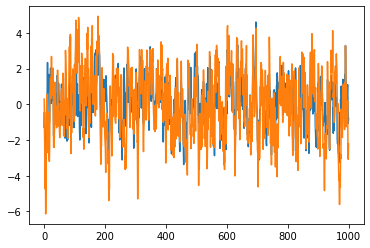

In [14]:
n = 1000
n_burn = 100
rho = np.array([0.5,0.2])
phi = np.array([0.1])

phi = np.concatenate((np.ones(1),phi))
m = max(len(rho),len(phi))
if len(rho)!=m: rho = np.concatenate((rho,np.zeros(shape=m-len(rho))))
if len(phi)!=m: phi = np.concatenate((phi,np.zeros(shape=m-len(phi))))

e = np.random.normal(size=n+n_burn) ## 100 burn-in
u = np.random.normal(size=n+n_burn) ## 100 burn-in
x = e.copy()
y = u.copy()
for i in range(m,n+n_burn):
    x[i] = np.flip(x[i-m:i])@rho+np.flip(e[i-m+1:i+1])@phi
    y[i] = np.flip(y[i-m:i])@rho+np.flip(u[i-m+1:i+1])@phi
x = x[n_burn:] ## cut off the burn in
y = y[n_burn:] ## cut off the burn in
y += x
pd.Series(x).plot()
pd.Series(y).plot();


In [16]:
ones = np.ones((n,1))
xx = np.hstack((ones,x.reshape(-1,1)))
b = np.linalg.solve(xx.T@xx,xx.T@y)
e = y - xx@b
b

array([-0.04830296,  0.95787431])

In [20]:
k = 3
xxx = np.hstack([e[k-i:-i].reshape(-1,1) for i in range(1,k+1)])
yy = e[k:]
bb = np.linalg.solve(xxx.T@xxx,xxx.T@yy)
ee = yy-xxx@bb
bb

array([ 0.59552288,  0.16974261, -0.04218941])

In [23]:
bvec = []
n_boot = 1000
for i in range(n_boot):
    sample = np.random.randint(ee.shape[0],size=(n+n_burn,))
    e_rs = ee[sample]
    for t in range(k,sample.shape[0]):
        e_rs[t] += e_rs[t-k:t]@bb
    e_rs = e_rs[n_burn:]
    y_rs = xx@b+e_rs
    b_rs = np.linalg.solve(xx.T@xx,xx.T@y_rs)
    bvec += [b_rs]
bvec = np.array(bvec)

In [24]:
bvec.sort(0)
print(bvec[int(n_boot*0.025)])
print(bvec[int(n_boot*0.975)])

[-0.26667911  0.87486617]
[0.1953107  1.03967136]


# 4. Programming challenges

## 4.1 $k$-Nearest neighbors

Write code that implements the $k$-nearest neighbors algorithm

## 4.2 Rolling bootstrap

Write code that implements a rolling bootstrap on time series data